In [158]:
import pandas as pd
import re
# Leemos el CSV con los códigos por provincia eliminando las 5 primeras columnas que ya
# hemos visto que no son relevantes.
bizkaia = pd.read_csv('datos_renta/Bizkaia.csv', index_col=False,encoding='iso-8859-1',sep=';',skiprows=5)
bizkaia.head(10)

,Unnamed: 0,2016
0,4800101001 Abadiño sección 01001,16.437
1,4800101002 Abadiño sección 01002,13.468
2,4800101003 Abadiño sección 01003,11.908
3,4800101004 Abadiño sección 01004,14.471
4,4800101005 Abadiño sección 01005,15.348
5,4800201001 Abanto y Ciérvana-Abanto Zierbena s...,12.440
6,4800201002 Abanto y Ciérvana-Abanto Zierbena s...,11.843
7,4800201004 Abanto y Ciérvana-Abanto Zierbena s...,11.482
8,4800201005 Abanto y Ciérvana-Abanto Zierbena s...,12.327
9,4800202001 Abanto y Ciérvana-Abanto Zierbena s...,12.929


In [151]:
# Función TOCHA TOCHA
bbdd = ["Alava","Albacete","Alicante","Almeria","Asturias","Avila","Badajoz","Barcelona",
        "Bizkaia","Burgos","Caceres","Cadiz","Cantabria","Islas Baleares","Castellon","Ceuta","Ciudad Real",
        "Cordoba","Coruña","Cuenca","Gipuzkoa","Girona","Granada","Guadalajara","Huelva","Huesca","Jaen","La Rioja",
        "Las Palmas","Leon","LLeida","Lugo","Madrid","Malaga","Melilla","Murcia","Navarra","Ourense","Palencia","Pontevedra",
       "Salamanca","Santa Cruz de Tenerife","Segovia","Sevilla","Soria","Tarragona","Teruel","Toledo","Valencia",
        "Valladolid","Zamora","Zaragoza"]
def get_BBDD_rentas (bbdd):
    #Carga de ficheros CSV
    base = []
    NIE = []
    renta = []
    poblacion = []
    provincias = []
    for i in bbdd:
        provincia = i
        datos = pd.read_csv('datos_renta/'+i+'.csv', index_col=False,encoding='iso-8859-1'
                            ,sep=';',skiprows=5, decimal= ',',thousands='.')
        datos.rename(columns={'Unnamed: 0':'identificador','2016':'renta'},inplace=True)
        datos.drop(datos.tail(3).index,inplace=True)
        for i in range(len(datos.identificador)):
            provincias.append(provincia)
        for i in range(len(datos.identificador)):
            NIE_value = int(re.findall("[0-9]+", datos.identificador[i])[0])
            NIE.append(NIE_value) 
        for i in range(len(datos.identificador)):
             nombre = re.findall("[a-zA-Záéíóúñ\\- /]+", datos.identificador[i])[0]
             nombre = re.sub(" sección","",nombre)
             nombre = re.sub(" secci","",nombre)
             poblacion.append(nombre)
        for i in range(len(datos.identificador)):
            if datos.renta[i] == '.':
                datos.renta[i] = float('NaN')
            if isinstance(datos.renta[i],str) == True:
                renta_value = float(re.sub("\\.","",datos.renta[i]))
                renta.append(renta_value)
            else:
                renta_value = float(datos.renta[i])
                renta.append(renta_value)
    d = {'provincia':provincias,'poblacion':poblacion,'NIE':NIE,'renta':renta}
    datos = pd.DataFrame(d)
    return datos

basedatos = get_BBDD_rentas(bbdd)
basedatos

,provincia,poblacion,NIE,renta
0,Alava,Agurain/Salvatierra,1051,12374.0
1,Alava,Alegría-Dulantzi,1001,13086.0
2,Alava,Amurrio,1002,13691.0
3,Alava,Añana,1049,15548.0
4,Alava,Aramaio,1003,17194.0
...,...,...,...,...
36284,Zaragoza,Zaragoza,5029712010,14085.0
36285,Zaragoza,Zuera,5029801001,12307.0
36286,Zaragoza,Zuera,5029801002,10848.0
36287,Zaragoza,Zuera,5029801003,10726.0


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
datos_renta = basedatos.groupby('provincia', as_index =False ).renta.mean()

datos_renta = datos_renta.sort_values('renta',ascending=False)

In [154]:
datos_renta

,provincia,renta
19,Gipuzkoa,15063.744015
8,Bizkaia,14133.047465
0,Alava,13891.549020
32,Madrid,13812.269827
36,Navarra,13270.694553
7,Barcelona,13164.468408
9,Burgos,12435.604215
4,Asturias,12146.514518
51,Zaragoza,11936.674593
20,Girona,11885.130435


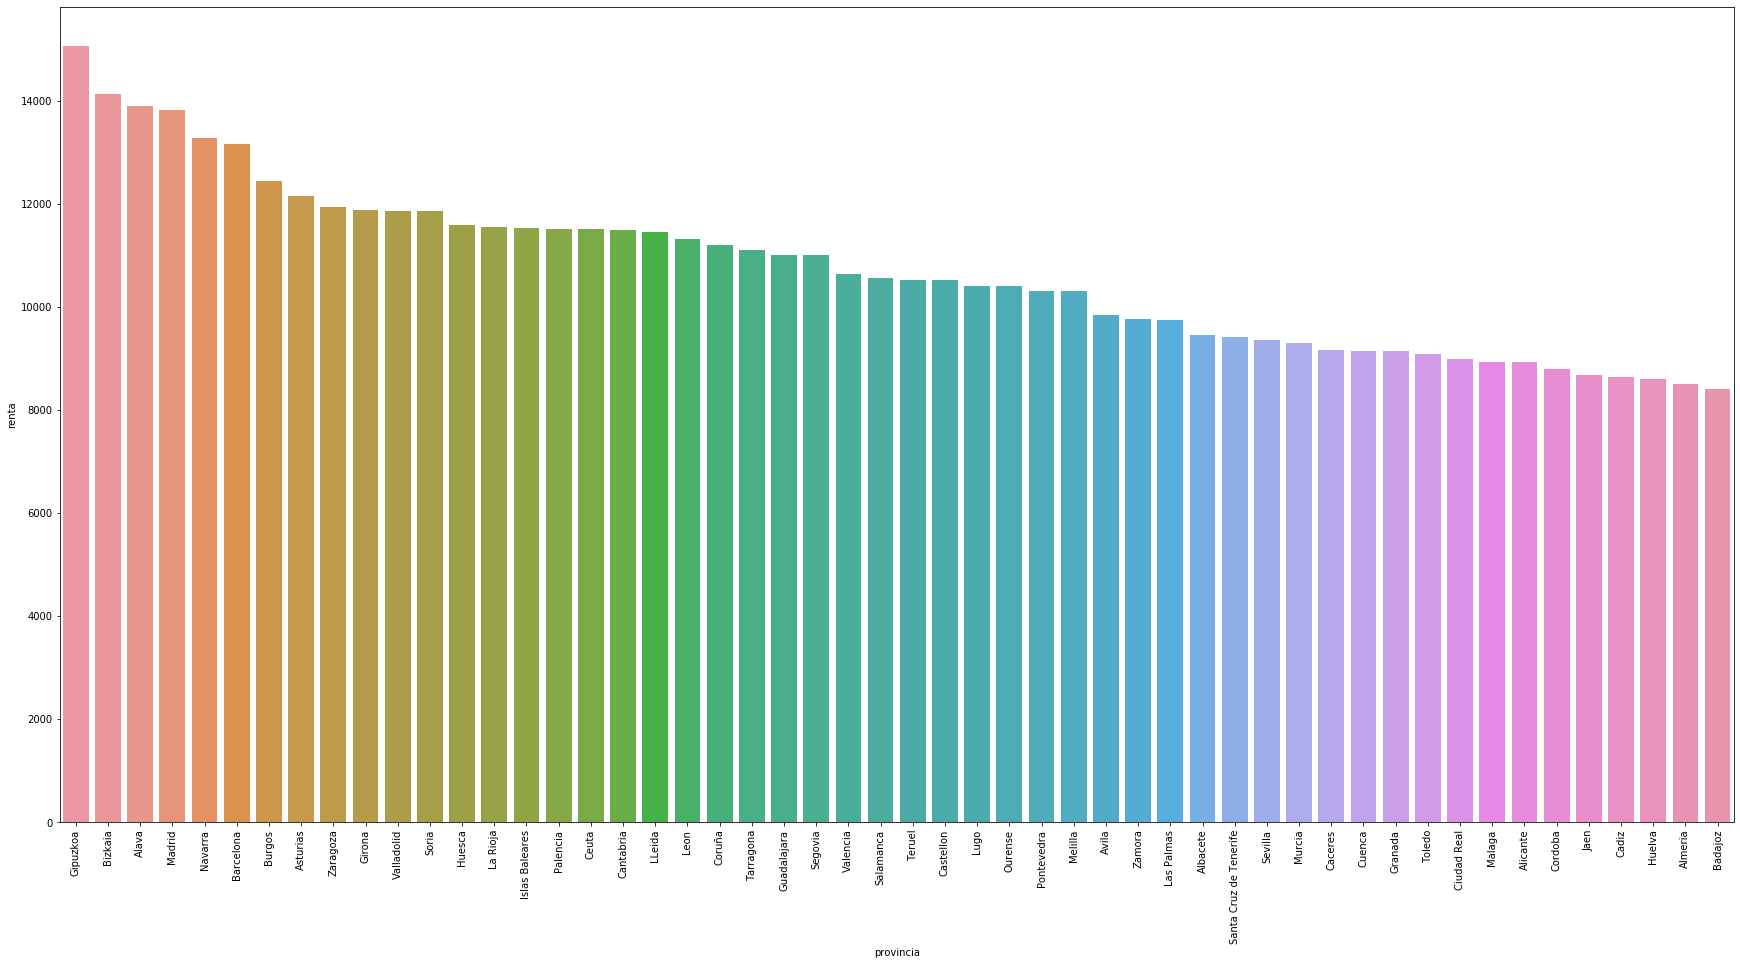

In [155]:
plt.figure(figsize=(30,15))
out = sns.barplot(x='provincia', y= "renta",data=datos_renta)
out=out.set_xticklabels(out.get_xticklabels(), rotation=90)